In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

G_PATH="C://Users//timna//OneDrive//Документы//Flat_Offers_Analysis//Data__30-01-2021__16-58.xlsx"

In [2]:
df=pd.read_excel(G_PATH)
df.head()

,id,Address,District,LAT,LON,Material,Price,Area,Price_per_msq,Rooms,Floor,Total_Floors
0,2916383585,"Республика Татарстан, Казань, улица Разведчика...",Советский,55.797935,49.179546,Кирпич,5800000,41.0,141463,1,9,19
1,3091043756,"Республика Татарстан, Казань, проспект Альберт...",Советский,55.786774,49.188098,Кирпич,11990000,86.5,138613,2,8,9
2,3048311873,"ул. Тэцевская, д. 4Д, Авиастроительный, Казань...",Авиастроительный,55.850730,49.061310,Монолит,3150000,31.3,100639,1,4,8
3,3045181243,"Республика Татарстан, Казань, улица Генерала Е...",Приволжский,55.680265,49.190963,Монолит,6000000,46.0,130435,1,3,5
4,3154341417,"Республика Татарстан, Казань, улица Максимова,...",Авиастроительный,55.861186,49.086759,Кирпич,6600000,88.0,75000,3,5,6


In [3]:
df.dtypes

id                 int64
Address           object
District          object
LAT              float64
LON              float64
Material          object
Price              int64
Area             float64
Price_per_msq      int64
Rooms             object
Floor              int64
Total_Floors       int64
dtype: object

Text(0, 0.5, '')

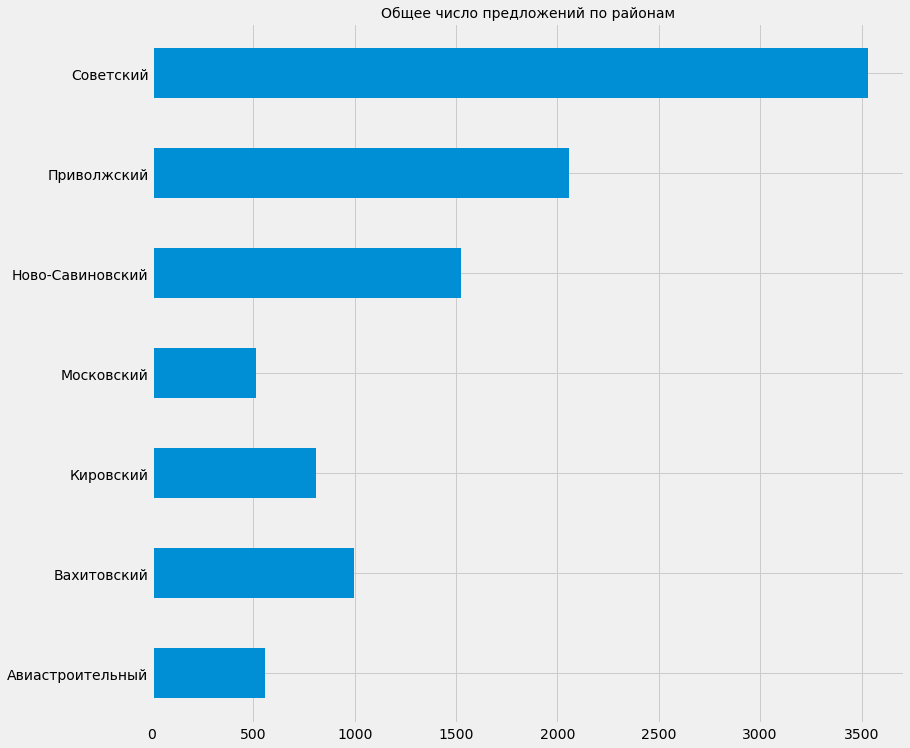

In [4]:
plt.style.use("fivethirtyeight")
df.groupby("District")["Address"].size().plot(kind='barh',figsize=(12,12),fontsize=14)
plt.title("Общее число предложений по районам",fontsize=14)
plt.ylabel("")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022121A4CD90>,
      dtype=object)

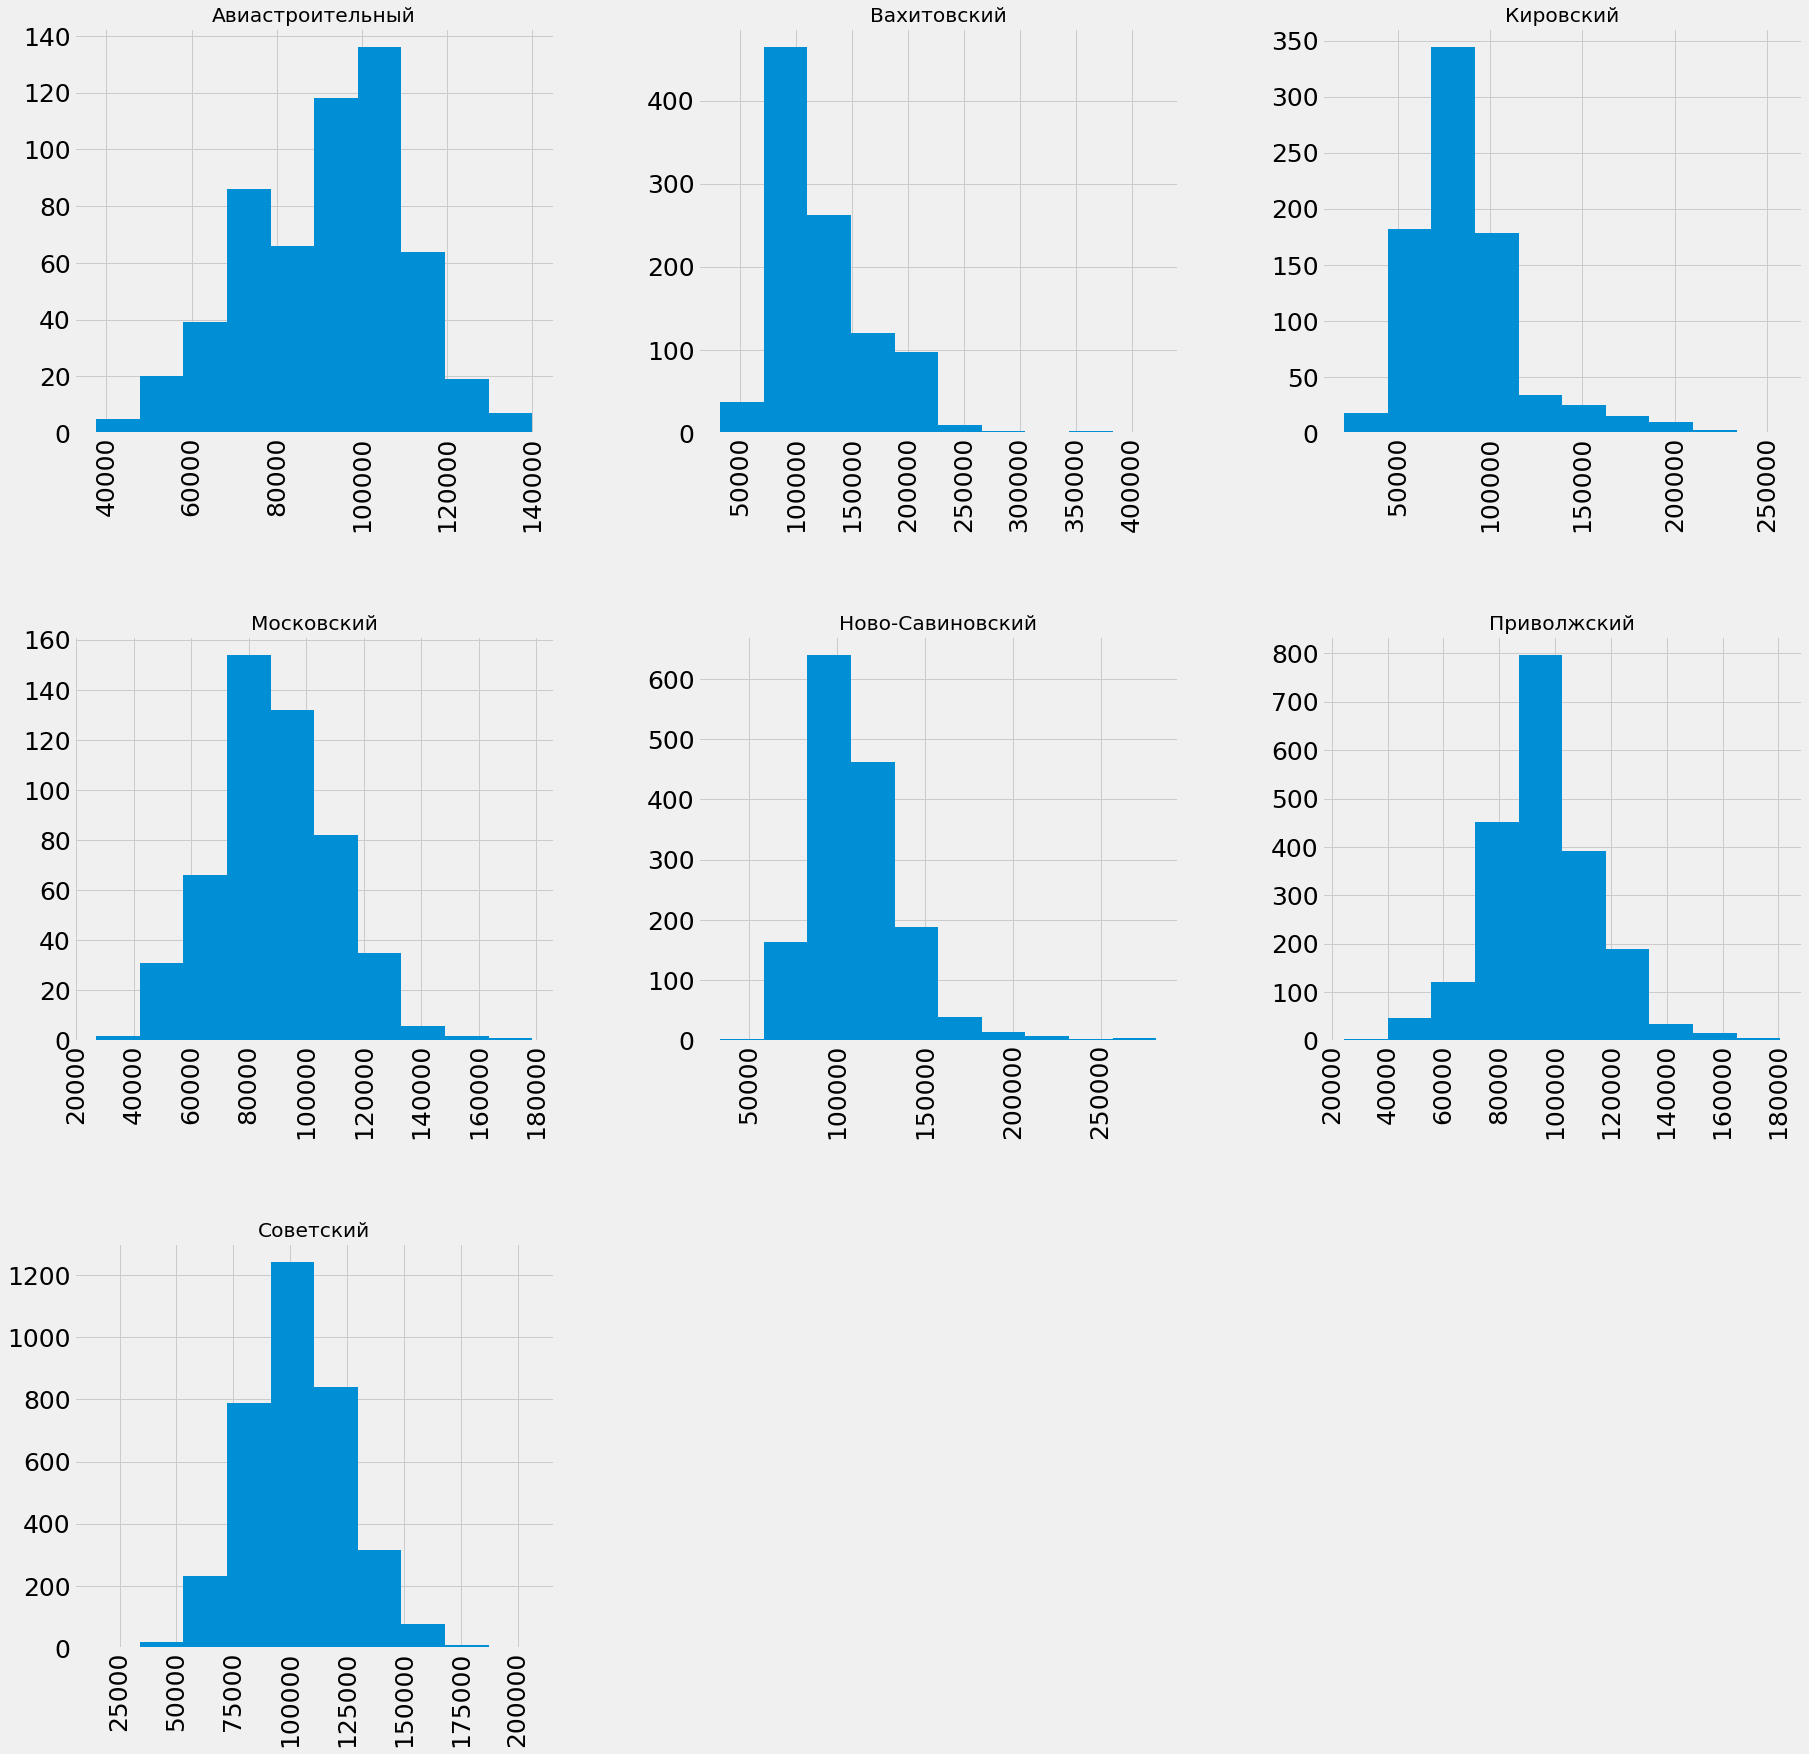

In [5]:
df.hist("Price_per_msq",by="District",figsize=(30,30),xlabelsize=25,ylabelsize=25)

Text(0.5, 0.98, '')

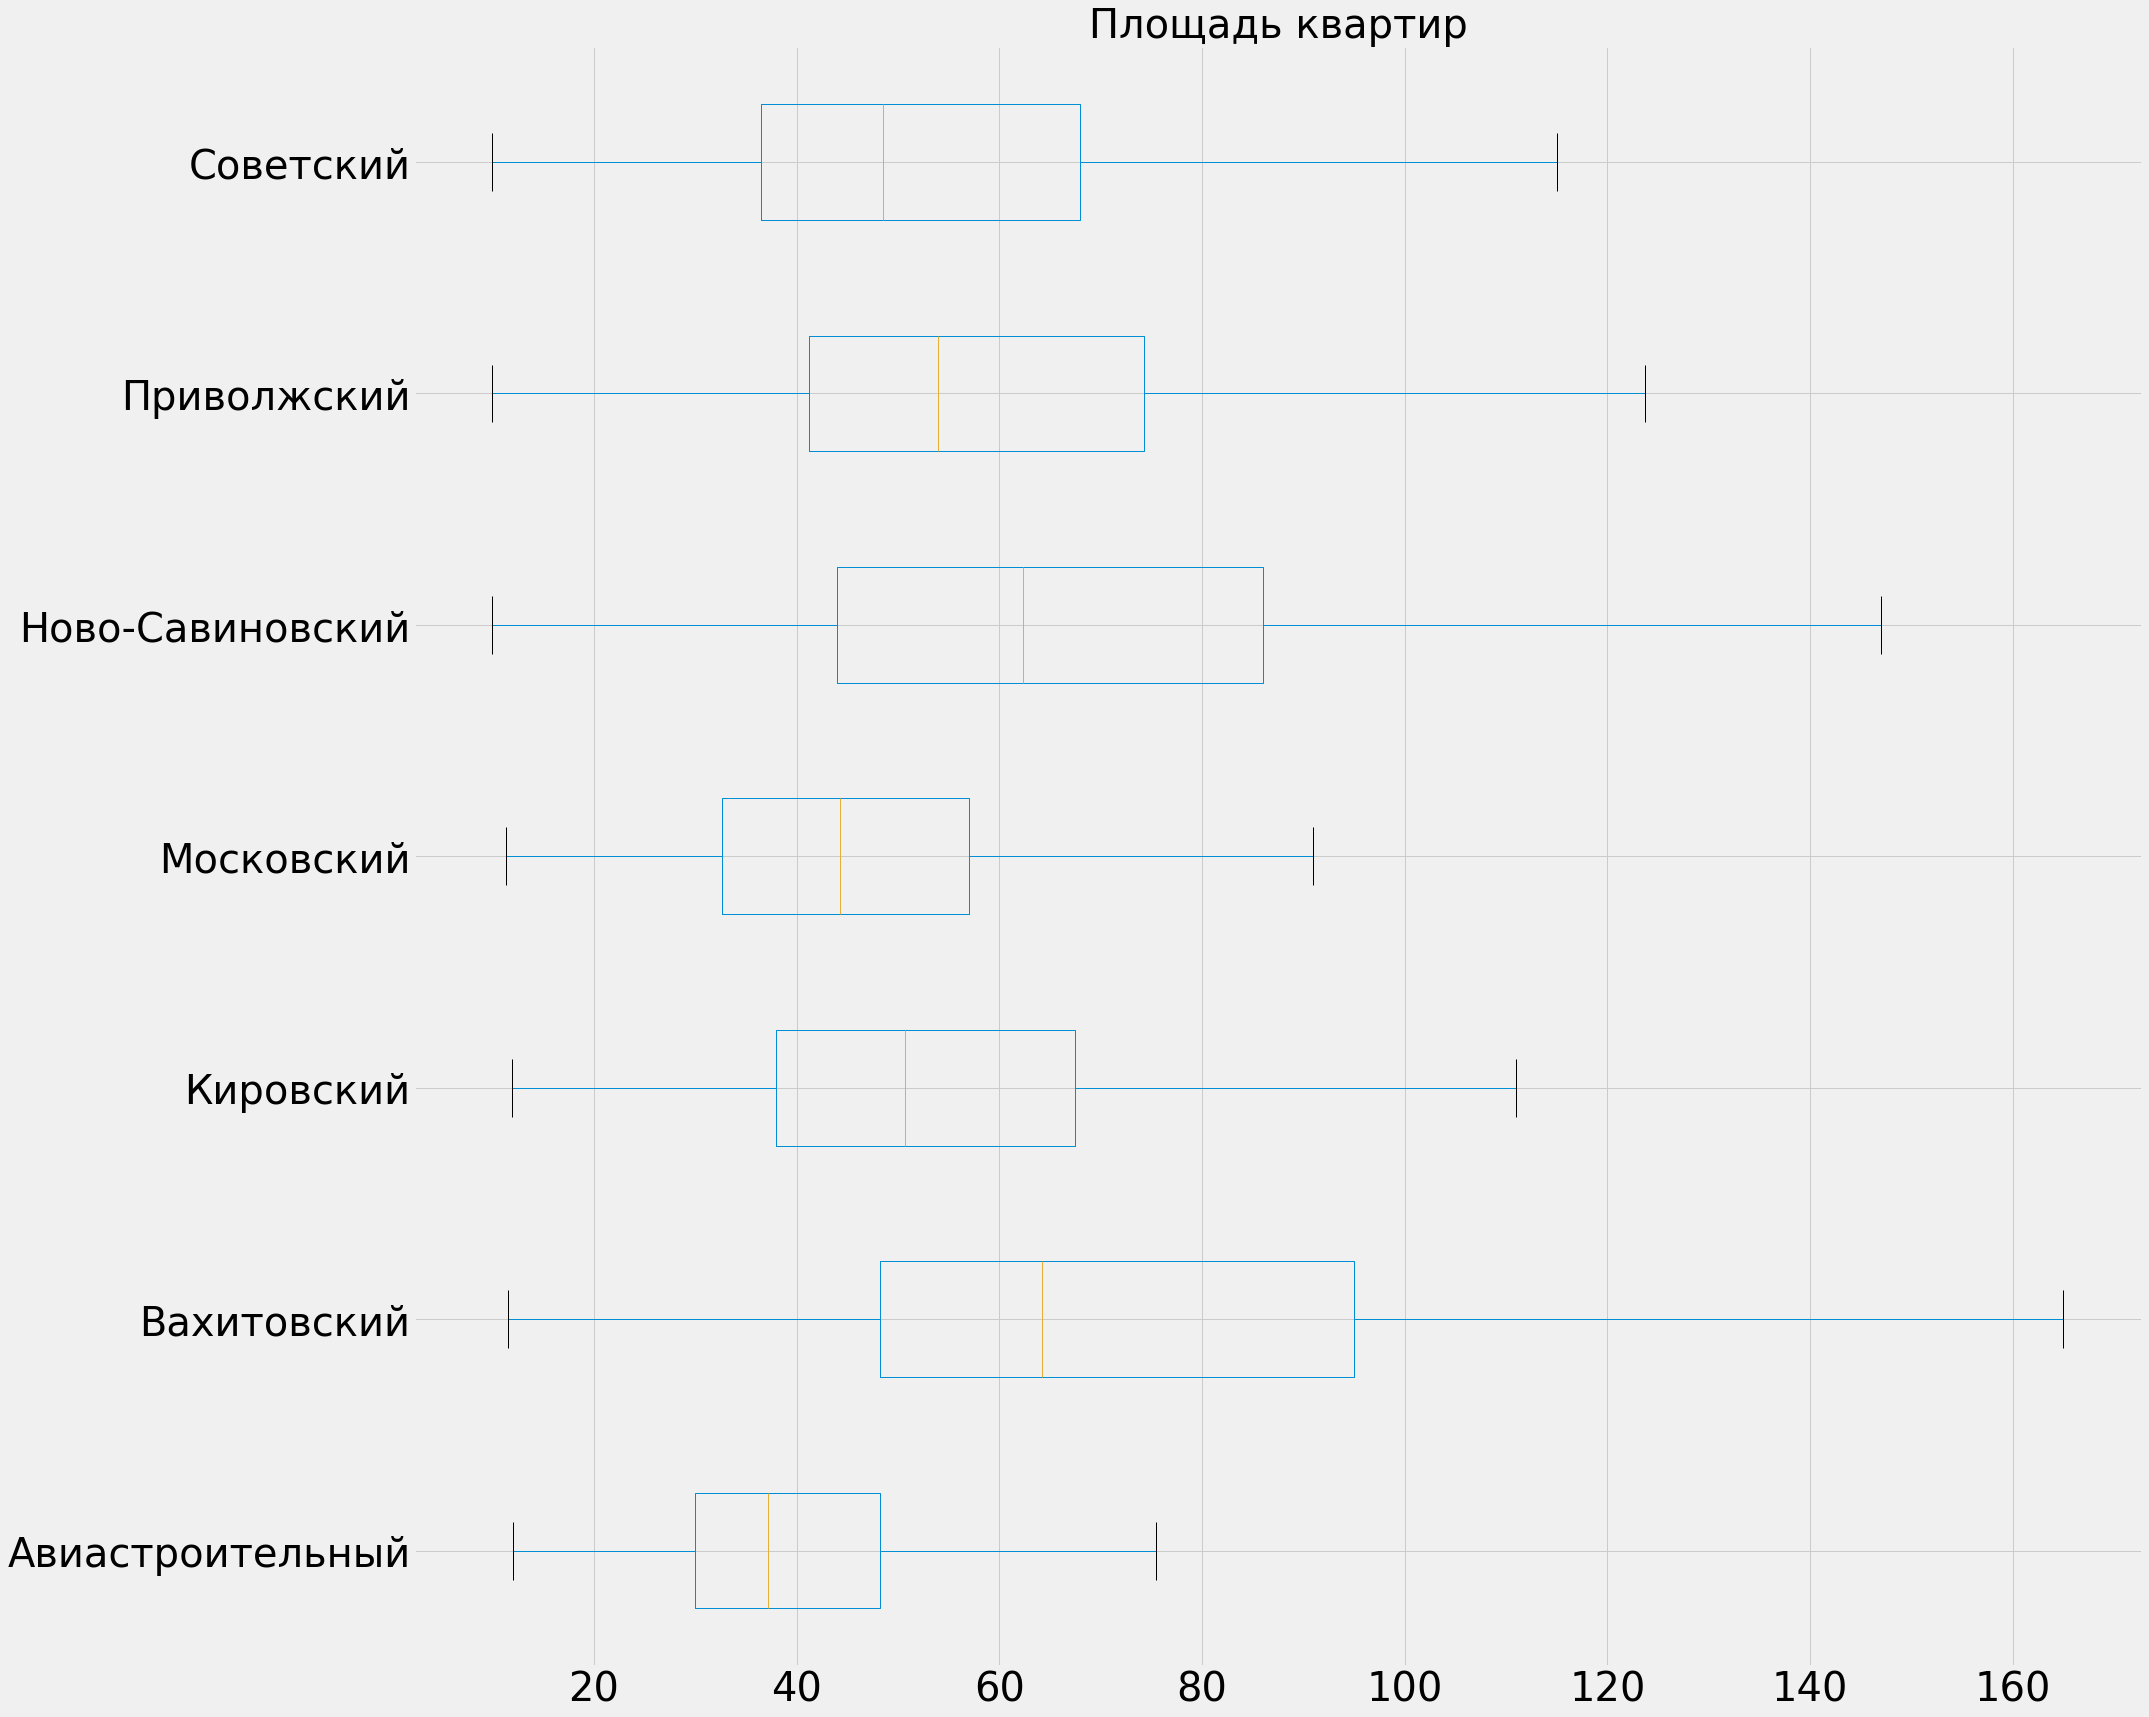

In [6]:
df.boxplot("Area",by="District",figsize=(30,30),fontsize=40,vert=False,showfliers=False)
plt.title("Площадь квартир",fontsize=40)
plt.xlabel("")
plt.suptitle("")

([], <a list of 0 Text major ticklabel objects>)

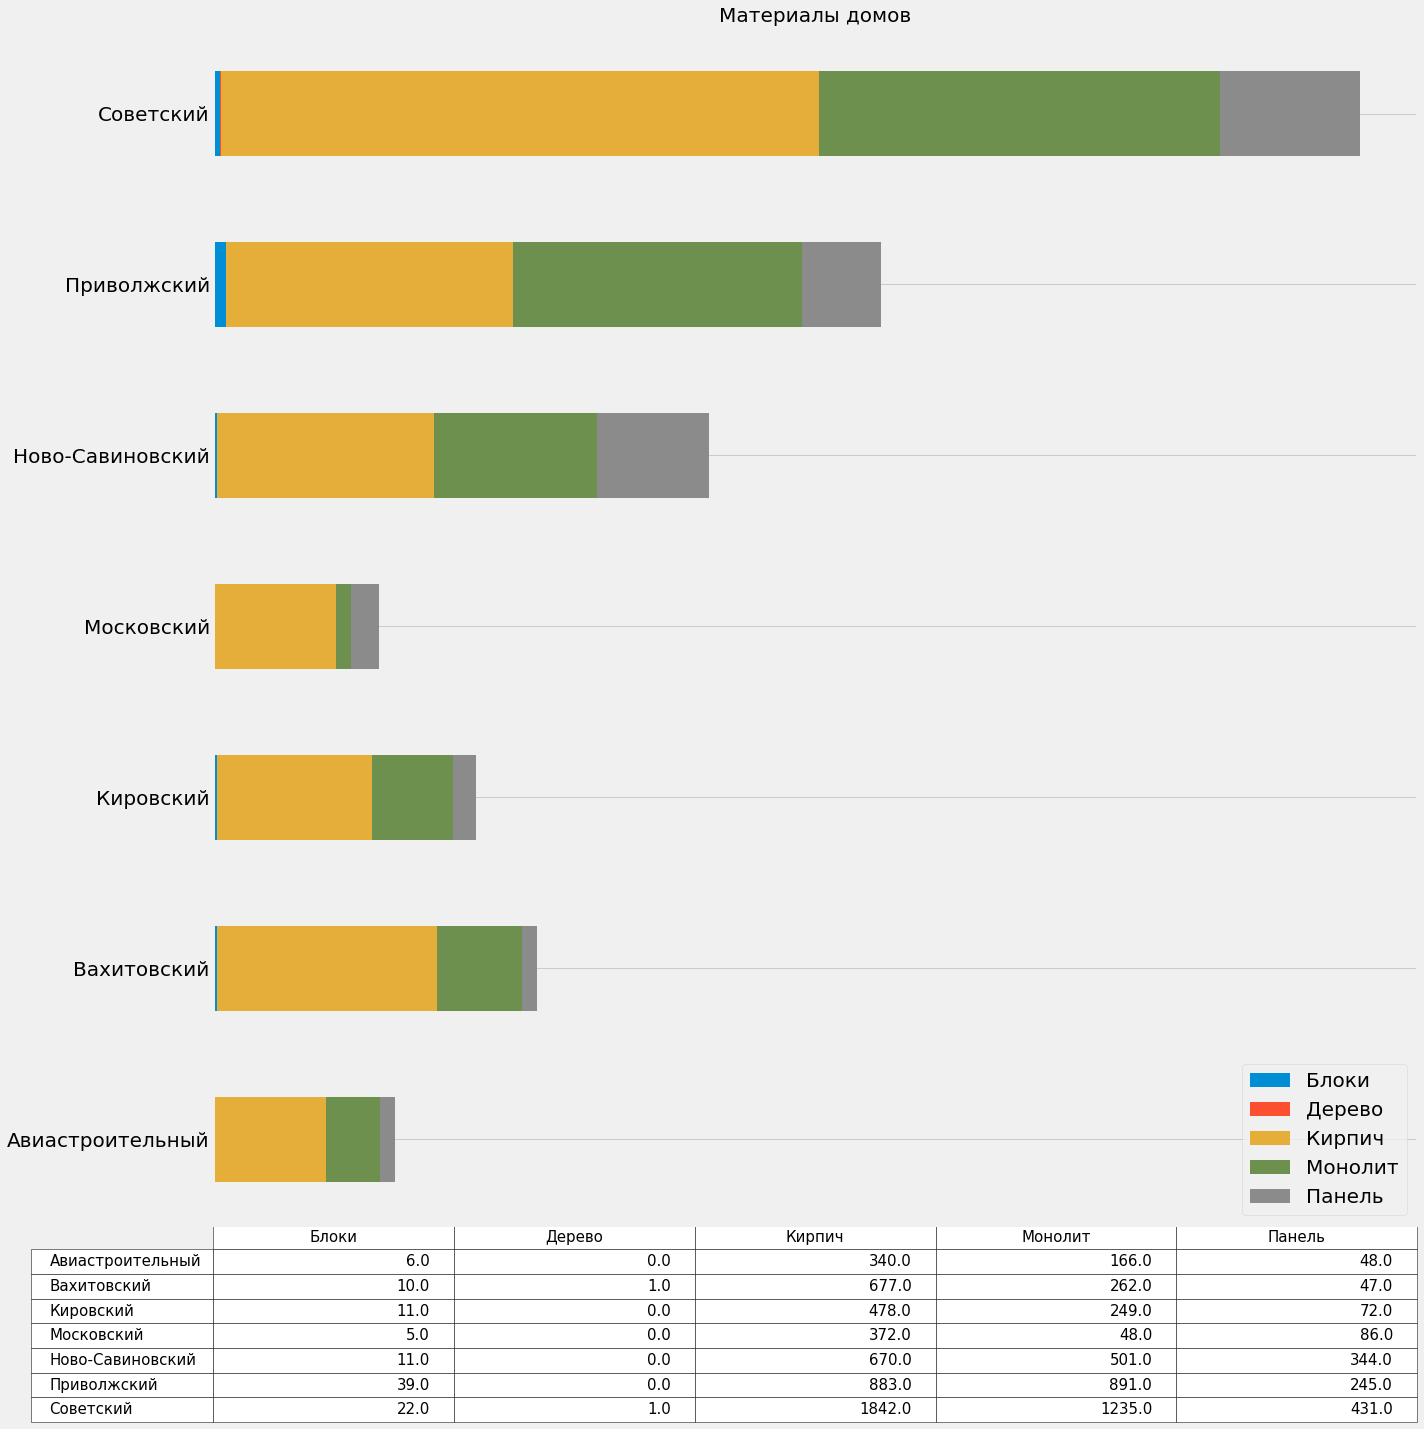

In [7]:
summary=df.groupby(["District","Material"]).size().unstack().fillna(0)
summary.plot.barh(stacked=True,figsize=(20,20),fontsize=20)
table=plt.table(cellText=summary.values,
         rowLabels=summary.index,
         colLabels=summary.columns,
        colWidths=[0.2]*5)
table.set_fontsize(15)
table.scale(1,2)
plt.ylabel('')
plt.title('Материалы домов',fontsize=20)
plt.legend(fontsize=20)
plt.tight_layout()
plt.xticks([])

In [8]:
df1=df.copy()

In [9]:
df1.loc[~df1["Rooms"].isin(["1","2","3","4","Студия","Своб. планировка"]),"Rooms"]='>4'

In [10]:
df1.loc[~df1["Rooms"].isin(["1","2","3","4",">4"]),"Rooms"]='Студия или Своб.Планировка'

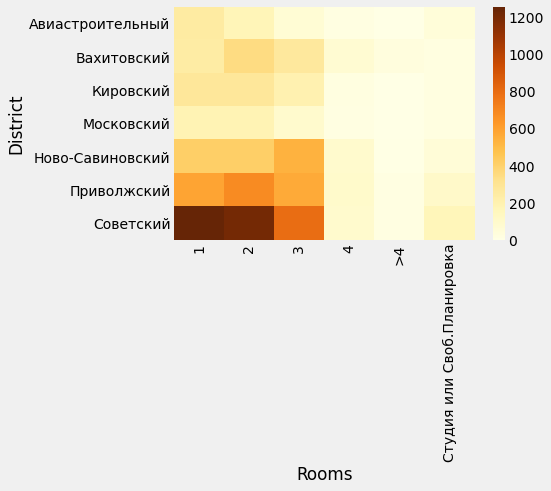

In [11]:
df_heatmap=df1[["District","Rooms"]].groupby(["District","Rooms"]).size().unstack().fillna(0)
sns.heatmap(df_heatmap,cmap='YlOrBr')